# Titanic PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def encode_label(df):
    #Label
    return df.astype('category').cat.codes

## Visualizing the data

In [5]:
df_train = pd.read_csv('./data/train.csv', header = 0, dtype={'Age': np.float64})
df_test  = pd.read_csv('./data/results.csv' , header = 0, dtype={'Age': np.float64})
df = df_train.append(df_test, ignore_index=True)

In [6]:
df.info()
df[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.shape[0]

1309

### Sex

In [8]:
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})

### Ticket

In [9]:
df['Ticket'] = df['Ticket'].map(lambda k: k[0])

In [10]:
df[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,P,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,3,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,3,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,1,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,3,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,3,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,2,30.0708,NaN,C


In [11]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

In [12]:
df['Ticket'] = encode_label(df['Ticket'])

In [13]:
df['Ticket']

0       3
1       5
2       6
3       0
4       2
5       2
6       0
7       2
8       2
9       1
10      5
11      0
12      3
13      2
14      2
15      1
16      2
17      1
18      2
19      1
20      1
21      1
22      2
23      0
24      2
25      2
26      1
27      0
28      2
29      2
       ..
1279    2
1280    2
1281    0
1282    5
1283    4
1284    4
1285    2
1286    0
1287    2
1288    0
1289    2
1290    1
1291    2
1292    1
1293    0
1294    0
1295    0
1296    6
1297    1
1298    0
1299    2
1300    6
1301    2
1302    0
1303    2
1304    3
1305    5
1306    6
1307    2
1308    1
Name: Ticket, Length: 1309, dtype: int8

In [14]:
df['Ticket'].value_counts()

2    429
1    278
0    210
3    119
6     98
5     98
4     77
Name: Ticket, dtype: int64

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,NaN,S


### Fare

Filling the Na of the Fare

In [16]:
df['Fare'].isna().value_counts()

False    1308
True        1
Name: Fare, dtype: int64

In [17]:
na_fare = df[df['Fare'].isna()]

In [18]:
na_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,0,3,"Storey, Mr. Thomas",0,60.5,0,0,2,NaN,NaN,S


In [19]:
na_fare['Ticket'].values[0]

2

In [20]:
df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) & 
                            (df['Pclass'] == na_fare['Pclass'].values[0]) & 
                            (df['Embarked'] == na_fare['Embarked'].values[0])].mean()

12.072079522184302

In [21]:
guess_Fare = df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) & 
                            (df['Pclass'] == na_fare['Pclass'].values[0]) & 
                            (df['Embarked'] == na_fare['Embarked'].values[0])].median()
df['Fare'].fillna(guess_Fare , inplace=True)

In [22]:
df['Fare'].isna().value_counts()

False    1309
Name: Fare, dtype: int64

### Fare bins

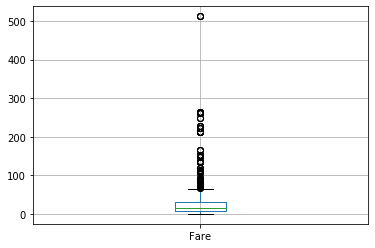

In [23]:
df.boxplot('Fare')

In [24]:
# bin Fare into five intervals with equal amount of people
df['Fare-bin'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)

### Cabin

In [25]:
# check if there is any NAN
df['Cabin'].isnull().sum(axis=0)

1014

In [26]:
df = df.drop(labels=['Cabin'], axis=1)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,S,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,S,2


### Embarked

In [28]:
#df = df.drop(labels='Embarked', axis=1)
df['Embarked'].isna().value_counts()

False    1307
True        2
Name: Embarked, dtype: int64

In [29]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [30]:
df['Embarked'].fillna("S", inplace=True)

In [31]:
df['Embarked'].isna().value_counts()

False    1309
Name: Embarked, dtype: int64

In [32]:
df['Embarked'] = encode_label(df['Embarked'])

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,0,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,2,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,2,2


### Name

In [34]:
df['Title'] = df['Name'].map(lambda z: z.split(",")[1].split(".")[0])

In [35]:
df['Title'] = encode_label(df['Title'])

In [36]:
def get_titles(df):
    title_dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Dona": "Royalty",
        "Sir": "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royalty"
    }
    print(df['Name'])

    def process_name(x):
        # print(x)
        return x.split(',')[1].split('.')[0].strip()

    df['Title'] = df['Name'].map(process_name)
    df['Title'] = df.Title.map(title_dictionary)
    print(df['Name'][df['Title'].isna()])

    return df

In [37]:
df = get_titles(df)
df['Title'] = df['Title'].map({'Officer': 0, 'Royalty': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Mr': 5}).astype(int)

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [38]:
df.drop('Name', axis=1, inplace=True)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,1,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,2,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,3,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,4,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,5,0,3,0,35.0,0,0,2,8.0500,2,2,5


### PassengerId

In [40]:
df.drop('PassengerId',axis= 1, inplace=True)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,0,3,0,35.0,0,0,2,8.0500,2,2,5


### Age

In [42]:
df['Age'].isna().value_counts()

False    1046
True      263
Name: Age, dtype: int64

The change of Age as a function of Title, Fare-bin, or SibSp is quite significant, so we'll use them to guess the missing values. We'll use a random forest regressor to do this. 

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
# notice that instead of using Title, we should use its corresponding dummy variables 
df_sub = df[['Age','Title','Fare','SibSp']]

In [45]:
X_train  = df_sub.dropna().drop('Age', axis=1)
y_train  = df['Age'].dropna()

X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)

In [46]:
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test),1)

In [47]:
df.Age.loc[df.Age.isnull()] = y_pred
df.Age.isnull().sum(axis=0) # no more NAN now

/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [48]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,0,3,0,35.0,0,0,2,8.0500,2,2,5


In [49]:
df['Age-bin'] = df['Age']
df.loc[df['Age-bin'] <= 16, 'Age-bin'] = 0
df.loc[(df['Age-bin'] > 16) & (df['Age-bin'] <= 32), 'Age-bin'] = 1
df.loc[(df['Age-bin'] > 32), 'Age-bin'] = 2

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title,Age-bin
0,0,3,0,22.0,1,0,3,7.2500,2,1,5,1.0
1,1,1,1,38.0,1,0,5,71.2833,0,5,2,2.0
2,1,3,1,26.0,0,0,6,7.9250,2,2,3,1.0
3,1,1,1,35.0,1,0,0,53.1000,2,5,2,2.0
4,0,3,0,35.0,0,0,2,8.0500,2,2,5,2.0


### Family

In [51]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 3 else 0)
df['MediumFamily'] = df['FamilySize'].map(lambda s: 1 if s == 4 else 0)
df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)


In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title,Age-bin,FamilySize,Singleton,SmallFamily,MediumFamily,LargeFamily
0,0,3,0,22.0,1,0,3,7.2500,2,1,5,1.0,2,0,1,0,0
1,1,1,1,38.0,1,0,5,71.2833,0,5,2,2.0,2,0,1,0,0
2,1,3,1,26.0,0,0,6,7.9250,2,2,3,1.0,1,1,0,0,0
3,1,1,1,35.0,1,0,0,53.1000,2,5,2,2.0,2,0,1,0,0
4,0,3,0,35.0,0,0,2,8.0500,2,2,5,2.0,1,1,0,0,0


# First ML executions

In [53]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [54]:
df_basic = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]

In [55]:
df_basic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,3,7.2500,2
1,1,1,1,38.0,1,0,5,71.2833,0
2,1,3,1,26.0,0,0,6,7.9250,2
3,1,1,1,35.0,1,0,0,53.1000,2
4,0,3,0,35.0,0,0,2,8.0500,2


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Survived        1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null int64
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null int8
Fare            1309 non-null float64
Embarked        1309 non-null int8
Fare-bin        1309 non-null int64
Title           1309 non-null int64
Age-bin         1309 non-null float64
FamilySize      1309 non-null int64
Singleton       1309 non-null int64
SmallFamily     1309 non-null int64
MediumFamily    1309 non-null int64
LargeFamily     1309 non-null int64
dtypes: float64(3), int64(12), int8(2)
memory usage: 156.0 KB


### Feature Selection and Clasifiying

In [64]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [65]:
X = df_basic.drop('Survived', axis=1)
y = df_basic['Survived']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [67]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(1309, 7)

In [68]:
X_new

array([[ 3.    ,  0.    , 22.    , ...,  3.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    , 38.    , ...,  5.    , 71.2833,  0.    ],
       [ 3.    ,  1.    , 26.    , ...,  6.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  0.    , 38.5   , ...,  6.    ,  7.25  ,  2.    ],
       [ 3.    ,  0.    , 31.    , ...,  2.    ,  8.05  ,  2.    ],
       [ 3.    ,  0.    ,  2.7   , ...,  1.    , 22.3583,  0.    ]])

In [69]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs')]

In [70]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_new, y)
clf.score(X_new, y)


0.9747899159663865

# Following with the feature extraction

### Dummy extraction

In [73]:
df = pd.get_dummies(df, columns=['Embarked', 'Pclass', 'Age-bin','Fare-bin', 'Title', 'Ticket'])

In [74]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,Singleton,SmallFamily,MediumFamily,...,Title_3,Title_4,Title_5,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6
0,0,0,22.0,1,0,7.2500,2,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,26.0,0,0,7.9250,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 38 columns):
Survived        1309 non-null int64
Sex             1309 non-null int64
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Fare            1309 non-null float64
FamilySize      1309 non-null int64
Singleton       1309 non-null int64
SmallFamily     1309 non-null int64
MediumFamily    1309 non-null int64
LargeFamily     1309 non-null int64
Embarked_0      1309 non-null uint8
Embarked_1      1309 non-null uint8
Embarked_2      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Age-bin_0.0     1309 non-null uint8
Age-bin_1.0     1309 non-null uint8
Age-bin_2.0     1309 non-null uint8
Fare-bin_1      1309 non-null uint8
Fare-bin_2      1309 non-null uint8
Fare-bin_3      1309 non-null uint8
Fare-bin_4      1309 non-null uint8
Fare-bin_5      1309 non-

## PCA

In [76]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = df.drop(['Survived', 'Age', 'Fare'], axis=1,)
pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
df_pca.head()

,Sex,SibSp,Parch,FamilySize,Singleton,SmallFamily,MediumFamily,LargeFamily,Embarked_0,Embarked_1,...,Title_3,Title_4,Title_5,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6
0,0,1,0,2,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,2,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [77]:
print(y_variance)

[4.56738197e-01 9.40894380e-02 6.39387556e-02 5.97334326e-02
 5.20544164e-02 3.91093503e-02 3.69472747e-02 3.29291508e-02
 2.15892455e-02 2.11272818e-02 1.91404008e-02 1.65915706e-02
 1.36962088e-02 1.16727018e-02 1.09717421e-02 1.05710175e-02
 9.19418168e-03 6.32622983e-03 5.65767717e-03 4.71923898e-03
 3.85843092e-03 3.27960628e-03 2.12216973e-03 2.03527304e-03
 1.22371004e-03 5.88383899e-04 9.49137830e-05 2.41580199e-30
 1.14571762e-31 4.53141450e-32 4.34143868e-32 1.74540355e-32
 1.40057484e-32 5.25183009e-33 5.16941398e-33]


In [78]:
print(pd.DataFrame(pca.components_, columns=df_pca.columns))

         Sex     SibSp     Parch  FamilySize  Singleton  SmallFamily  \
0   0.054698  0.449330  0.331074    0.780405  -0.176201     0.060750   
1  -0.177414  0.192836 -0.119226    0.073610   0.158493    -0.199462   
2   0.298841 -0.550253  0.573975    0.023723  -0.009036    -0.024137   
3  -0.431006 -0.282735  0.391548    0.108813   0.119620    -0.178334   
4  -0.052611  0.066825 -0.093190   -0.026365  -0.082619     0.104257   
5  -0.250148 -0.067986  0.108442    0.040456  -0.111754     0.146041   
6  -0.043113 -0.111089  0.162922    0.051833   0.012153    -0.023736   
7   0.074193  0.068691  0.004899    0.073590   0.444931    -0.606676   
8  -0.118671 -0.062086  0.000821   -0.061264  -0.156564     0.169346   
9  -0.023522  0.007876 -0.012150   -0.004274   0.078449    -0.095409   
10 -0.183588 -0.089056  0.058830   -0.030226  -0.072055     0.090764   
11  0.037196 -0.002634 -0.032395   -0.035029  -0.059778     0.083877   
12 -0.014576  0.016716 -0.028385   -0.011669   0.173468    -0.26

Text(0.5, 1.0, 'PCA')

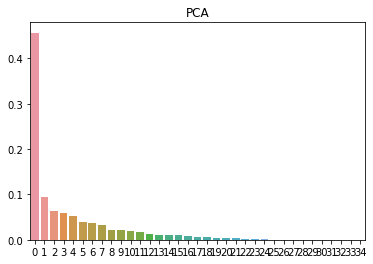

In [79]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")

### Feature Selection

In [80]:
pca = PCA()
df_pca = df.drop(['Survived', 'Fare', 'FamilySize', 'Age', 'LargeFamily', 'SibSp', 'Parch', 'Ticket_6', 'Age-bin_2.0', 'Title_5', 'Pclass_3', 'Fare-bin_5', 'Embarked_2'], axis=1,)
df_transformed = pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
df_pca.head()

,Sex,Singleton,SmallFamily,MediumFamily,Embarked_0,Embarked_1,Pclass_1,Pclass_2,Age-bin_0.0,Age-bin_1.0,...,Title_1,Title_2,Title_3,Title_4,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
Sex             1309 non-null int64
Singleton       1309 non-null int64
SmallFamily     1309 non-null int64
MediumFamily    1309 non-null int64
Embarked_0      1309 non-null uint8
Embarked_1      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Age-bin_0.0     1309 non-null uint8
Age-bin_1.0     1309 non-null uint8
Fare-bin_1      1309 non-null uint8
Fare-bin_2      1309 non-null uint8
Fare-bin_3      1309 non-null uint8
Fare-bin_4      1309 non-null uint8
Title_0         1309 non-null uint8
Title_1         1309 non-null uint8
Title_2         1309 non-null uint8
Title_3         1309 non-null uint8
Title_4         1309 non-null uint8
Ticket_0        1309 non-null uint8
Ticket_1        1309 non-null uint8
Ticket_2        1309 non-null uint8
Ticket_3        1309 non-null uint8
Ticket_4        1309 non-null uint8
Ticket_5        1309 non-null

Text(0.5, 1.0, 'PCA')

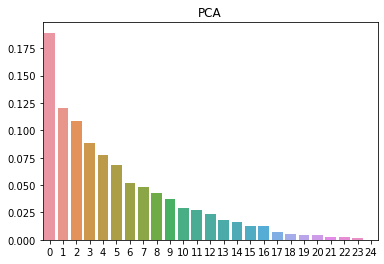

In [82]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")

In [83]:
df_transformed

array([[-6.99678006e-04,  1.24757350e-01,  1.12982164e-01, ...,
        -5.49175346e-02, -5.32236944e-03,  5.43709374e-03],
       [ 1.54105890e+00, -6.54873757e-01,  3.44208436e-01, ...,
         3.40674708e-02, -3.18083993e-02,  3.54913250e-03],
       [-5.55782506e-01,  9.88279532e-02,  6.03987034e-01, ...,
        -9.36130540e-02,  5.55925892e-03, -4.12446813e-03],
       ...,
       [-5.86905839e-01, -3.13614198e-01, -3.62805427e-01, ...,
        -7.80538823e-02, -1.90810744e-03,  6.78268531e-04],
       [-1.14081605e+00, -5.58683588e-02,  1.80491755e-01, ...,
         1.88906262e-02,  2.27524828e-03,  1.01833147e-04],
       [ 1.15013024e+00,  3.09342470e-01, -5.92730175e-01, ...,
         1.81928641e-01,  7.58807727e-03, -3.14316633e-03]])

## Classification

In [84]:
y_train = df[0:891]['Survived']
X_train = df_pca[0:891]
y_test = df[891:]['Survived']
X_test = df_pca[891:]

In [85]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33)

### Traditional methods

In [86]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [88]:
X_train

array([[-0.73769513, -1.2316449 ,  1.54526137, ...,  3.09953914,
        -0.23598136, -0.28052182],
       [ 1.35557354, -1.2316449 ,  1.54526137, ..., -0.32262861,
        -0.23598136,  3.56478503],
       [ 1.35557354,  0.81192233, -0.64713971, ..., -0.32262861,
        -0.23598136, -0.28052182],
       ...,
       [ 1.35557354, -1.2316449 , -0.64713971, ...,  3.09953914,
        -0.23598136, -0.28052182],
       [-0.73769513,  0.81192233, -0.64713971, ..., -0.32262861,
        -0.23598136, -0.28052182],
       [-0.73769513,  0.81192233, -0.64713971, ..., -0.32262861,
        -0.23598136, -0.28052182]])

In [89]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs')]

In [90]:
scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    cv_results = cross_validate(clf, X_test, y_test, cv=5, return_train_score=True)
    scores.append(np.mean(cv_results['test_score']))

/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/jan/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/skle

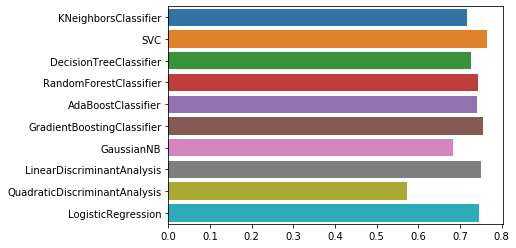

In [91]:
sns.barplot(y=[n.__class__.__name__  for n in classifiers], x=scores, orient='h')

## Saving the dataframes to further work

In [93]:
df_pca['Survived'] = df['Survived']
df_pca.to_csv('./data/titanic_kernel.csv')